In [14]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import xgboost as xgb
from sklearn.model_selection import KFold
from skopt import BayesSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Model used : XGBoost

In [2]:
house = pd.read_csv('train.csv', index_col='Id')

In [3]:
house

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
#MSSC column -> label encoding
house.iloc[:,0].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [9]:
#MSZoning Column -> label encoding
house.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

<AxesSubplot:>

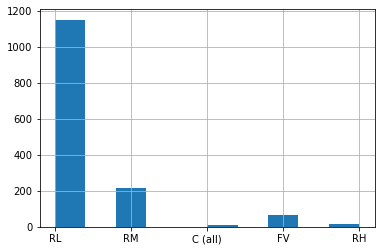

In [10]:
house.MSZoning.hist()

<AxesSubplot:>

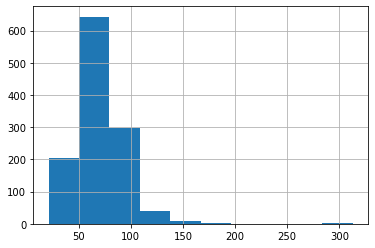

In [14]:
#LotFrontage -> NaN -> 0
house.LotFrontage.hist()

<AxesSubplot:>

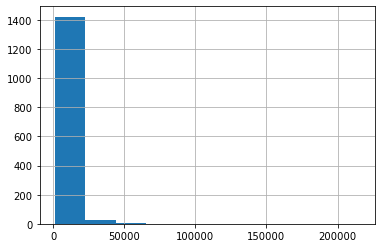

In [17]:
#LotArea -> Normalization, clipping...?
house.LotArea.hist()

In [20]:
#Street -> Label_encoding
house.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [22]:
#Alley -> Label encoding, NA means -> Label
house.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [25]:
#LotShape -> Label encoding
house.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [28]:
#LandContour -> Label encoding
house.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [30]:
#Utilities -> Label_encoding
house.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [31]:
#LotConfig -> Labelencoding
house.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [32]:
#landSlope -> Labelencoding
house.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [33]:
#Neighborhood -> label encoding
house.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [35]:
#Condition1 -> Label encoding
house.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [36]:
#Condition2 -> Label encoding
house.Condition2.value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
RRAn         1
PosA         1
RRAe         1
Name: Condition2, dtype: int64

In [38]:
#BldgType -> Label encoding
house.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [39]:
#HouseStyle -> label encoding
house.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [41]:
#OverallQual -> .
house.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [43]:
#OverallCond -> .
house.OverallCond.value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

<AxesSubplot:>

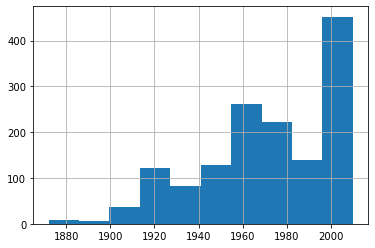

In [48]:
#YearBuilt -> .
house.YearBuilt.hist()

<AxesSubplot:>

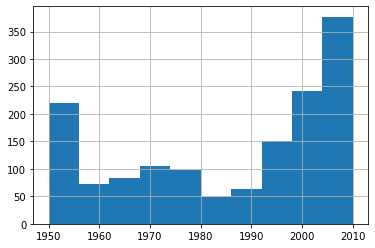

In [49]:
#YearRemodAdd -> if n == YearBuilt : 0
house.YearRemodAdd.hist()

In [51]:
#RoofStyle -> Label encoding
house.RoofStyle.value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [53]:
#RoofMatl -> Label encoding
house.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Metal         1
Roll          1
Membran       1
Name: RoofMatl, dtype: int64

In [55]:
#Exterior1st -> label encoding
house.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64

In [56]:
#Exterior2nd -> Label encoding
house.Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [58]:
#MasVnrType -> Na : None, Labelencoding
house.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

<AxesSubplot:>

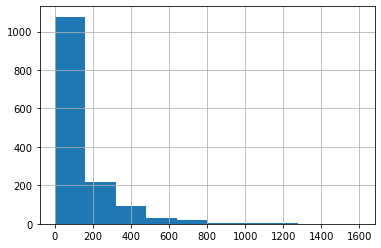

In [59]:
#MasVnrArea -> NA : 0
house.MasVnrArea.hist()

In [62]:
#ExterQual -> Sequential label encoding
house.ExterQual.value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [63]:
#ExterCond -> Sequential label encoding
house.ExterCond.value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [65]:
#Foundation -> label_encoding
house.Foundation.value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [66]:
#BsmtQual -> NA : 0, Sequential label encoding
house.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [68]:
#BsmtCond -> NA : 0, Sequential label encoding
house.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [70]:
#BsmtExposure -> NA : 0, Sequential label encoding
house.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [71]:
#BsmtFinType1 -> NA : 0, Sequential label encoding
house.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [73]:
#BsmtFinSF1 -> .
house.BsmtFinSF1.value_counts()

0       467
24       12
16        9
20        5
686       5
       ... 
1032      1
1022      1
599       1
1018      1
1904      1
Name: BsmtFinSF1, Length: 637, dtype: int64

In [33]:
#BsmtFinType2 -> NA : 0, Sequential label encoding
house.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [ ]:
#BsmtFinSF2 -> .
house.BsmtFinSF2.hist()

<AxesSubplot:>

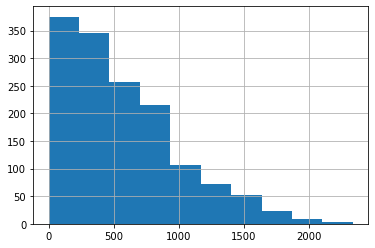

In [76]:
#BsmtUnfSF -> .
house.BsmtUnfSF.hist()

<AxesSubplot:>

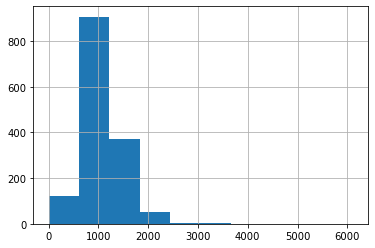

In [77]:
#TotalBsmtSF -> .
house.TotalBsmtSF.hist()

In [78]:
#Heating -> label encoding
house.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [80]:
#HeatingQC -> Sequential label encoding
house.HeatingQC.value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [82]:
#CentralAir -> Label encoding
house.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [84]:
#Electrical -> Remove NA row, label_encoding
house.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

<AxesSubplot:>

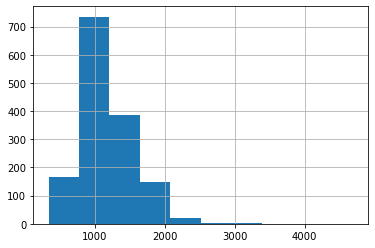

In [86]:
#1stFlrSF -> .
house['1stFlrSF'].hist()

<AxesSubplot:>

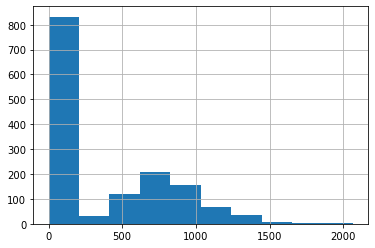

In [88]:
#2ndFlrSF -> .
house['2ndFlrSF'].hist()

<AxesSubplot:>

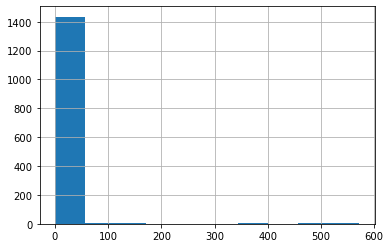

In [89]:
#LowQualFinSF -> .
house.LowQualFinSF.hist()

<AxesSubplot:>

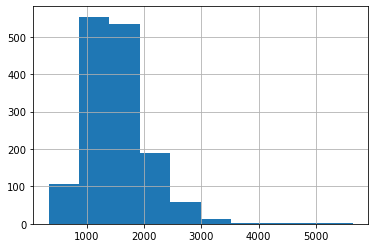

In [91]:
#GrLivArea ->
house.GrLivArea.hist()

<AxesSubplot:>

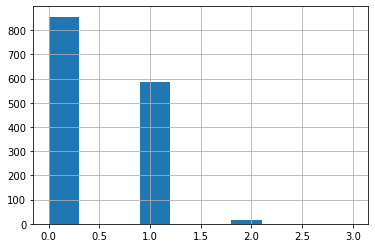

In [92]:
#BsmtFullBatch -> .
house.BsmtFullBath.hist()

<AxesSubplot:>

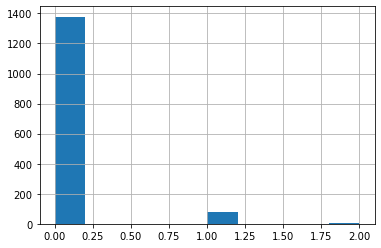

In [93]:
#BsmtHalfBatch -> .
house.BsmtHalfBath.hist()

<AxesSubplot:>

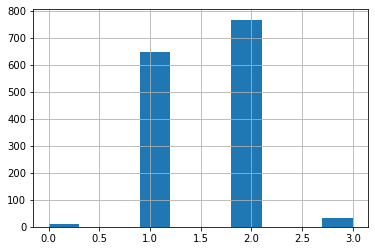

In [95]:
#FullBath -> .
house.FullBath.hist()

<AxesSubplot:>

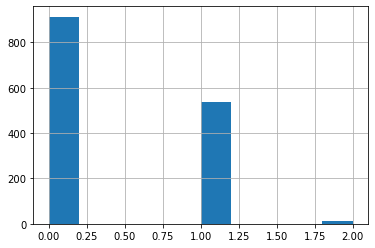

In [96]:
#HalfBath -> .
house.HalfBath.hist()

<AxesSubplot:>

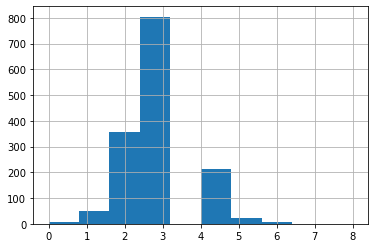

In [97]:
#BedroomAbvGr -> .
house.BedroomAbvGr.hist()

<AxesSubplot:>

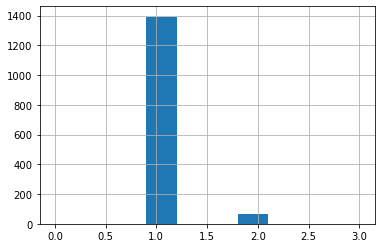

In [98]:
#KitchenAbvGr -> .
house.KitchenAbvGr.hist()

In [100]:
#KitchenQual -> Sequential label encoding
house.KitchenQual.value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

<AxesSubplot:>

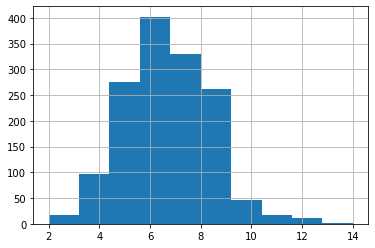

In [102]:
#TotRmsAbvGrd -> .
house.TotRmsAbvGrd.hist()

In [104]:
#Functional -> label encoding
house.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [107]:
#Fireplaces -> .
house.Fireplaces.value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [108]:
#FireplacesQu -> Sequential label encoding
house.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [109]:
#GarageType -> NA : 0, label_encoding
house.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

<AxesSubplot:>

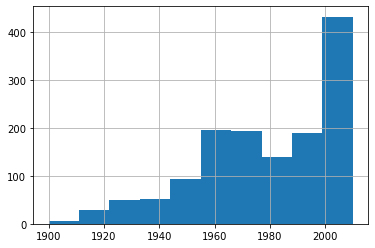

In [110]:
#GarageYrBlt -> NA : 0
house.GarageYrBlt.hist()

In [111]:
#GarageFinish -> NA : 0, Sequential label encoding
house.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

<AxesSubplot:>

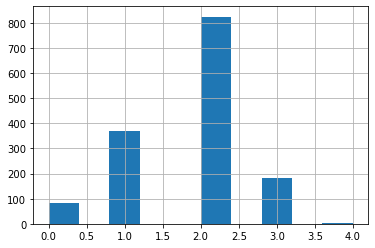

In [112]:
#GarageCars -> .
house.GarageCars.hist()

<AxesSubplot:>

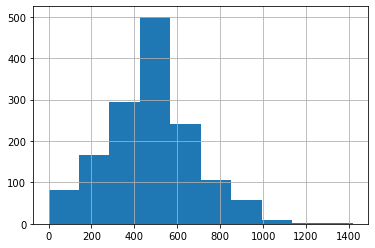

In [113]:
#GarageArea -> .
house.GarageArea.hist()

In [116]:
#GarageQual -> NA : 0, Sequential label encoding
house.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [118]:
#GarageCond -> NA : 0. Sequential label encoding
house.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [120]:
#PavedDrive -> label encoding
house.PavedDrive.value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

<AxesSubplot:>

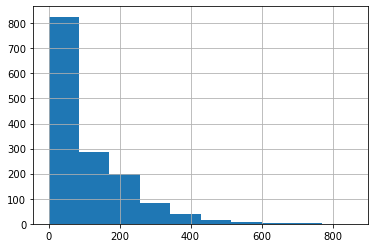

In [122]:
#WoodDeckSF -> .
house.WoodDeckSF.hist()

<AxesSubplot:>

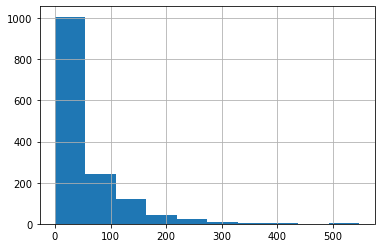

In [123]:
#OpenPorchSF -> .
house.OpenPorchSF.hist()

<AxesSubplot:>

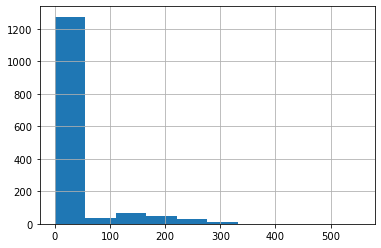

In [125]:
#EnclosedPorch -> .
house.EnclosedPorch.hist()

<AxesSubplot:>

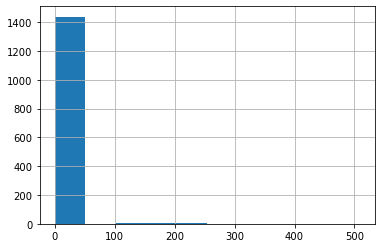

In [126]:
#3SsnPorch -> .
house['3SsnPorch'].hist()

<AxesSubplot:>

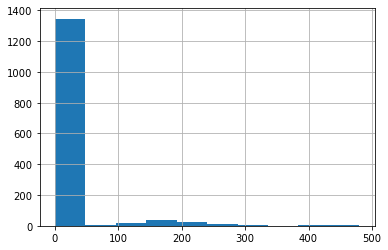

In [127]:
#ScreenPorch -> .
house.ScreenPorch.hist()

<AxesSubplot:>

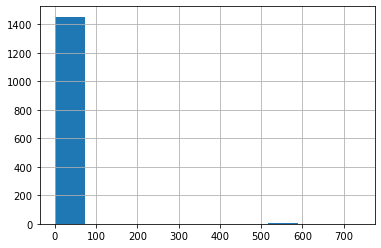

In [128]:
#PoolArea -> .
house.PoolArea.hist()

In [130]:
#PoolQC -> NA : 0, Sequential label encoding
house.PoolQC.value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [134]:
#Fence NA : 0, label encoding
house.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [136]:
#MiscFeature NA : 0, label encoding
house.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

<AxesSubplot:>

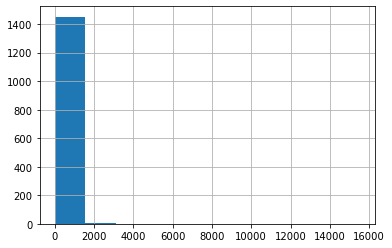

In [137]:
#MiscVal -> .
house.MiscVal.hist()

<AxesSubplot:>

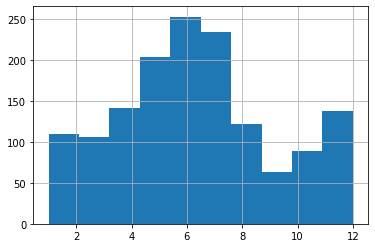

In [138]:
#MoSold -> .
house.MoSold.hist()

<AxesSubplot:>

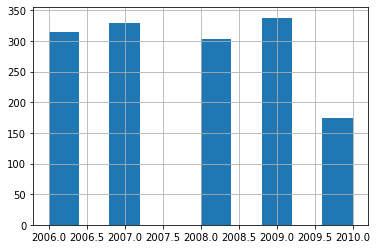

In [140]:
#YrSold -> .
house.YrSold.hist()

In [142]:
#SaleType -> label_encoding
house.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [144]:
#Salecondition -> label encoding
house.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

<AxesSubplot:>

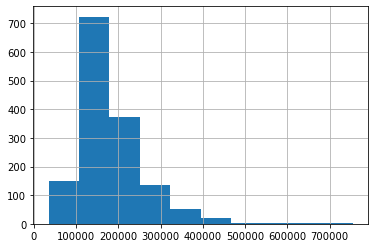

In [146]:
#SalePrice -> label
house.SalePrice.hist()

In [7]:
le = preprocessing.LabelEncoder()

def convert(c):
    if c == np.NaN:
        return int(0)
    if c == 'Po':
        return int(1)
    if c == 'Fa':
        return int(2)
    if c == 'TA':
        return int(3)
    if c == 'Gd':
        return int(4)
    else:
        return int(5)
    
def convert2(c2):
    if c2 == np.NaN:
        return int(0)
    if c2 == 'No':
        return int(1)
    if c2 == 'Mn':
        return int(2)
    if c2 == 'Av':
        return int(3)
    else:
        return int(4)
    
def convert3(c3):
    if c3 == np.NaN:
        return int(0)
    if c3 == 'Unf':
        return int(1)
    if c3 == 'LwQ':
        return int(2)
    if c3 == 'Rec':
        return int(3)
    if c3 == 'BLQ':
        return int(4)
    if c3 == 'ALQ':
        return int(5)
    else:
        return int(6)

def convert4(c4):
    if c4 == np.NaN:
        return int(0)
    if c4 == 'Unf':
        return int(1)
    if c4 == 'RFn':
        return int(2)
    else:
        return int(3)

In [8]:
def preprocessing1(tdf):
    #MSSubClass
    MSSC = tdf.MSSubClass.astype('category')
    tdf.MSSubClass = le.fit_transform(MSSC)
    #MSZoning
    tdf.MSZoning = le.fit_transform(tdf.MSZoning.replace(np.NaN, 'RL'))
    #LotFrontage
    tdf.LotFrontage = tdf.LotFrontage.replace(np.NaN, 0)
    #LotArea -> Normalization, clipping...?
    tdf.LotArea = np.clip(tdf.LotArea, a_max=70000, a_min = 0)
    #Street -> Label_encoding
    tdf.Street = le.fit_transform(tdf.Street)
    #Alley -> Label encoding, NA means -> Label
    tdf.Alley = le.fit_transform(tdf.Alley.replace(np.NaN, 'NoAccess'))
    #LotShape -> Label encoding
    tdf.LotShape = le.fit_transform(tdf.LotShape)
    #LandContour -> Label encoding
    tdf.LandContour = le.fit_transform(tdf.LandContour)
    #Utilities -> Label_encoding
    tdf.Utilities = le.fit_transform(tdf.Utilities.replace(np.NaN, 'AllPub'))
    #LotConfig -> Labelencoding
    tdf.LotConfig = le.fit_transform(tdf.LotConfig)
    #landSlope -> Labelencoding
    tdf.LandSlope = le.fit_transform(tdf.LandSlope)
    #Neighborhood -> label encoding
    tdf.Neighborhood = le.fit_transform(tdf.Neighborhood)
    #Condition1 -> Label encoding
    tdf.Condition1 = le.fit_transform(tdf.Condition1)
    #Condition2 -> Label encoding
    tdf.Condition2 = le.fit_transform(tdf.Condition2)
    #BldgType -> Label encoding
    tdf.BldgType = le.fit_transform(tdf.BldgType)
    #HouseStyle -> label encoding
    tdf.HouseStyle = le.fit_transform(tdf.HouseStyle)
    #YearRemodAdd -> if n == YearBuilt : 0
    zz = []
    for i in range(0,len(tdf)):
        if house.iloc[i,18] == house.iloc[i,19]:
            zz.append(0)
        else:
            zz.append(house.iloc[i,19])
    tdf.YearRemodAdd = zz
    #RoofStyle -> Label encoding
    tdf.RoofStyle = le.fit_transform(tdf.RoofStyle)
    #RoofMatl -> Label encoding
    tdf.RoofMatl = le.fit_transform(tdf.RoofMatl)
    #Exterior1st -> label encoding
    tdf.Exterior1st = le.fit_transform(tdf.Exterior1st.replace(np.NaN, 'VinylSd'))
    #Exterior2nd -> Label encoding
    tdf.Exterior2nd = le.fit_transform(tdf.Exterior2nd.replace(np.NaN, 'VinylSd'))
    #MasVnrType -> Na : None, Labelencoding
    tdf.MasVnrType = le.fit_transform(tdf.MasVnrType.replace(np.NaN, 'None'))
    #MasVnrArea -> NA : 0
    tdf.MasVnrArea = tdf.MasVnrArea.replace(np.NaN, 0)
    #ExterQual -> Sequential label encoding
    tdf.ExterQual = tdf.ExterQual.apply(convert)
    #ExterCond -> Sequential label encoding
    tdf.ExterCond = tdf.ExterCond.apply(convert)
    #Foundation -> label_encoding
    tdf.Foundation = le.fit_transform(tdf.Foundation)
    #BsmtQual -> NA : 0, Sequential label encoding
    tdf.BsmtQual = tdf.BsmtQual.apply(convert)
    #BsmtCond -> NA : 0, Sequential label encoding
    tdf.BsmtCond = tdf.BsmtQual.apply(convert)
    #BsmtExposure -> NA : 0, Sequential label encoding
    tdf.BsmtExposure = tdf.BsmtExposure.apply(convert2)
    #BsmtFinType1 -> NA : 0, Sequential label encoding
    tdf.BsmtFinType1 = tdf.BsmtFinType1.apply(convert3)
    #BsmtFinType2 -> NA : 0, Sequential label encoding
    tdf.BsmtFinType2 = tdf.BsmtFinType2.apply(convert3)
    #Heating -> label encoding
    tdf.Heating = le.fit_transform(tdf.Heating)
    #HeatingQC -> Sequential label encoding
    tdf.HeatingQC = tdf.HeatingQC.apply(convert)
    #CentralAir -> Label encoding
    tdf.CentralAir = le.fit_transform(tdf.CentralAir)
    #Electrical -> NA to 'None', label_encoding
    tdf.Electrical = le.fit_transform(tdf.Electrical.replace(np.NaN, 'None'))
    #KitchenQual -> Sequential label encoding
    tdf.KitchenQual = tdf.KitchenQual.apply(convert)
    #Functional -> label encoding
    tdf.Functional = le.fit_transform(tdf.Functional.replace(np.NaN, 'Typ'))
    #FireplacesQu -> Sequential label encoding
    tdf.FireplaceQu = tdf.FireplaceQu.apply(convert)
    #GarageType -> NA : 0, label_encoding
    tdf.GarageType = le.fit_transform(tdf.GarageType.replace(np.NaN, 'None'))
    #GarageYrBlt -> NA : 0
    tdf.GarageYrBlt = tdf.GarageYrBlt.replace(np.NaN, int(0))
    #GarageFinish -> NA : 0, Sequential label encoding
    tdf.GarageFinish = tdf.GarageFinish.apply(convert4)
    #GarageQual -> NA : 0, Sequential label encoding
    tdf.GarageQual = tdf.GarageQual.apply(convert)
    #GarageCond -> NA : 0. Sequential label encoding
    tdf.GarageCond = tdf.GarageCond.apply(convert)
    #PavedDrive -> label encoding
    tdf.PavedDrive = le.fit_transform(tdf.PavedDrive)
    #PoolQC -> NA : 0, Sequential label encoding
    tdf.PoolQC = tdf.PoolQC.apply(convert)
    #Fence NA : 0, label encoding
    tdf.Fence = le.fit_transform(tdf.Fence.replace(np.NaN, 'None'))
    #MiscFeature NA : 0, label encoding
    tdf.MiscFeature = le.fit_transform(tdf.MiscFeature.replace(np.NaN, 'None'))
    #SaleType -> label_encoding
    tdf.SaleType = le.fit_transform(tdf.SaleType.replace(np.NaN, 'WD'))
    #Salecondition -> label encoding
    tdf.SaleCondition = le.fit_transform(tdf.SaleCondition)
    
    return(tdf)

In [11]:
train = preprocessing1(house)

In [12]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,5,3,65.0,8450,1,1,3,3,0,4,...,0,5,4,1,0,2,2008,8,4,208500
2,0,3,80.0,9600,1,1,3,3,0,2,...,0,5,4,1,0,5,2007,8,4,181500
3,5,3,68.0,11250,1,1,0,3,0,4,...,0,5,4,1,0,9,2008,8,4,223500
4,6,3,60.0,9550,1,1,0,3,0,0,...,0,5,4,1,0,2,2006,8,0,140000
5,5,3,84.0,14260,1,1,0,3,0,2,...,0,5,4,1,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,5,3,62.0,7917,1,1,3,3,0,4,...,0,5,4,1,0,8,2007,8,4,175000
1457,0,3,85.0,13175,1,1,3,3,0,4,...,0,5,2,1,0,2,2010,8,4,210000
1458,6,3,66.0,9042,1,1,3,3,0,4,...,0,5,0,3,2500,5,2010,8,4,266500


In [16]:
X_train, X_val, y_train, y_val = train_test_split(train.loc[:,[x for x in train.columns if x != 'SalePrice' ]], train.loc[:,'SalePrice'], test_size = 0.3, random_state = 42)
print(len(X_train))
print(len(X_val))

1022
438


In [17]:
Iteration = 100

bayes_cv_tuner = BayesSearchCV(
    estimator = xgb.XGBRegressor(
        n_jobs = 1,
        objective = 'reg:squarederror',
        eval_metric = 'rmse',
        tree_method = 'approx'
    ),
    search_spaces = {
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'min_child_weight': (0, 10),
        'colsample_bynode' : (0,1),
        'max_depth': (1, 50),
        'max_delta_step': (0, 20),
        'subsample': (0.01, 1.0, 'uniform'),
        'colsample_bytree': (0.01, 1.0, 'uniform'),
        'colsample_bylevel': (0.01, 1.0, 'uniform'),
        'reg_lambda': (1, 1000, 'log-uniform'),
        'reg_alpha': (1e-5, 1.0, 'log-uniform'),
        'gamma': (1e-5, 0.5, 'log-uniform'),
        'min_child_weight': (0, 5),
        'n_estimators': (50, 500),
        'scale_pos_weight': (1, 500, 'log-uniform')
    },
    cv = KFold(
        n_splits = 10,
        shuffle = True,
        random_state = 42
    ),
    n_jobs = 8,
    n_iter = Iteration,
    verbose = 0,
    refit = True,
    random_state = 42
)

def status_print(optim_result):
    all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)
    best_params = pd.Series(bayes_cv_tuner.best_params_)
    clf_name = bayes_cv_tuner.estimator.__class__.__name__
    all_models.to_csv(clf_name + '_cv_result.csv')

result = bayes_cv_tuner.fit(X, y, callback = status_print)

In [19]:
params = dict(result.best_params_)
params

{'colsample_bylevel': 0.44823929459082695,
 'colsample_bynode': 1,
 'colsample_bytree': 0.24874872968444184,
 'gamma': 2.0373680414872807e-05,
 'learning_rate': 0.35931481390434145,
 'max_delta_step': 0,
 'max_depth': 42,
 'min_child_weight': 4,
 'n_estimators': 370,
 'reg_alpha': 0.0016294360251939137,
 'reg_lambda': 586,
 'scale_pos_weight': 350,
 'subsample': 0.5062353603770533}

In [20]:
result.best_score_

0.8710196133718405

In [21]:
clf = xgb.XGBRegressor(**params,objective='reg:squarederror')

In [22]:
clf.fit(X, y, eval_set = [(X_train, y_train), (X_val, y_val)], early_stopping_rounds = 30, verbose = True)

[0]	validation_0-rmse:164778.07812	validation_1-rmse:166534.12500
[1]	validation_0-rmse:139721.93750	validation_1-rmse:142095.35938
[2]	validation_0-rmse:120345.73438	validation_1-rmse:123304.64844
[3]	validation_0-rmse:107568.25000	validation_1-rmse:111038.10156
[4]	validation_0-rmse:96815.70312	validation_1-rmse:101008.76562
[5]	validation_0-rmse:88238.87500	validation_1-rmse:92725.56250
[6]	validation_0-rmse:81145.26562	validation_1-rmse:85922.89062
[7]	validation_0-rmse:76108.07812	validation_1-rmse:81066.46875
[8]	validation_0-rmse:71089.63281	validation_1-rmse:76221.21094
[9]	validation_0-rmse:67262.72656	validation_1-rmse:72589.69531
[10]	validation_0-rmse:64290.68359	validation_1-rmse:69766.55469
[11]	validation_0-rmse:61751.51172	validation_1-rmse:67332.88281
[12]	validation_0-rmse:59750.21094	validation_1-rmse:65358.16406
[13]	validation_0-rmse:58051.94531	validation_1-rmse:63736.41016
[14]	validation_0-rmse:56284.16797	validation_1-rmse:61975.46094
[15]	validation_0-rmse:547

XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.44823929459082695, colsample_bynode=1,
             colsample_bytree=0.24874872968444184, gamma=2.0373680414872807e-05,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.35931481390434145, max_delta_step=0, max_depth=42,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=370, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0.0016294360251939137, reg_lambda=586,
             scale_pos_weight=350, subsample=0.5062353603770533,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
fi = pd.DataFrame({'Colname' : [x for x in X.columns], 'score' : clf.feature_importances_})
fi = fi.sort_values(by = 'score', ascending = False)
fi

,Colname,score
52,KitchenQual,0.096244
60,GarageCars,0.086521
48,FullBath,0.082374
45,GrLivArea,0.064644
16,OverallQual,0.063396
...,...,...
20,RoofStyle,0.001578
4,Street,0.000000
30,BsmtCond,0.000000
70,PoolArea,0.000000


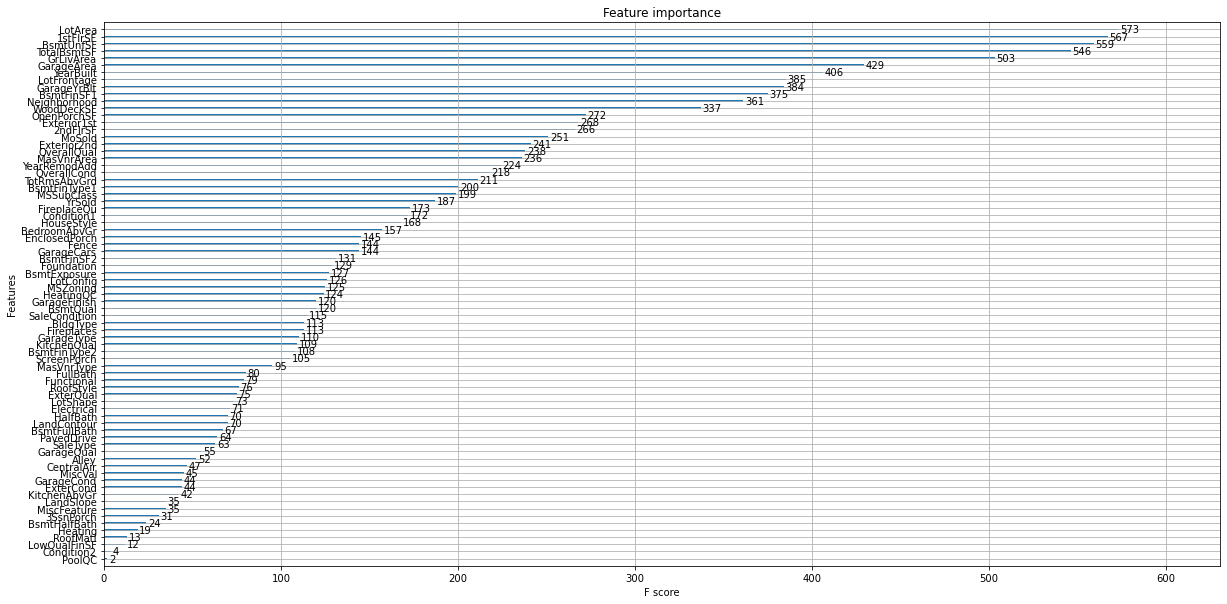

In [24]:
fig, ax = plt.subplots(figsize = [20,10])
xgb.plot_importance(clf,ax = ax)
plt.show()

In [80]:
#optimized Colsample_by_tree :0.448 -> so, i'll take only 60% of columns and will try gain

train_2 = train.loc[:,[x for x in train.columns if x in fi.iloc[:int(len(fi) * 0.6),0].values] + ['SalePrice']]
train_2

,MSSubClass,MSZoning,LotArea,LandContour,LandSlope,Neighborhood,Condition1,Condition2,OverallQual,OverallCond,...,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,OpenPorchSF,MiscFeature,MoSold,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,5,3,8450,3,0,5,2,2,7,5,...,2,2,548,3,2,61,1,2,4,208500
2,0,3,9600,3,0,24,1,2,6,8,...,2,2,460,3,2,0,1,5,4,181500
3,5,3,11250,3,0,5,2,2,7,5,...,2,2,608,3,2,42,1,9,4,223500
4,6,3,9550,3,0,6,2,2,7,5,...,1,3,642,3,2,35,1,2,0,140000
5,5,3,14260,3,0,15,2,2,8,5,...,2,3,836,3,2,84,1,12,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,5,3,7917,3,0,8,2,2,6,5,...,2,2,460,3,2,40,1,8,4,175000
1457,0,3,13175,3,0,14,2,2,6,6,...,1,2,500,3,2,0,1,2,4,210000
1458,6,3,9042,3,0,6,2,2,7,9,...,2,1,252,3,2,60,3,5,4,266500


In [84]:
X_2, y_2 = train_2.loc[:,[x for x in train_2.columns if x != 'SalePrice']], train_2.SalePrice

In [85]:
X_train2, X_val2, y_train2, y_val2 = train_test_split(train_2.loc[:,[x for x in train_2.columns if x != 'SalePrice' ]], train_2.loc[:,'SalePrice'], test_size = 0.3, random_state = 42)

In [87]:
Iteration = 100

bayes_cv_tuner = BayesSearchCV(
    estimator = xgb.XGBRegressor(
        n_jobs = 1,
        objective = 'reg:squarederror',
        eval_metric = 'rmse',
        tree_method = 'approx'
    ),
    search_spaces = {
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'min_child_weight': (0, 10),
        'colsample_bynode' : (0,1),
        'max_depth': (1, 50),
        'max_delta_step': (0, 20),
        'subsample': (0.01, 1.0, 'uniform'),
        'colsample_bytree': (0.01, 1.0, 'uniform'),
        'colsample_bylevel': (0.01, 1.0, 'uniform'),
        'reg_lambda': (1, 1000, 'log-uniform'),
        'reg_alpha': (1e-5, 1.0, 'log-uniform'),
        'gamma': (1e-5, 0.5, 'log-uniform'),
        'min_child_weight': (0, 5),
        'n_estimators': (50, 500),
        'scale_pos_weight': (1, 500, 'log-uniform')
    },
    cv = KFold(
        n_splits = 10,
        shuffle = True,
        random_state = 42
    ),
    n_jobs = 16,
    n_iter = Iteration,
    verbose = 0,
    refit = True,
    random_state = 42
)

def status_print(optim_result):
    all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)
    best_params = pd.Series(bayes_cv_tuner.best_params_)
    clf_name = bayes_cv_tuner.estimator.__class__.__name__
    all_models.to_csv(clf_name + '_cv_result.csv')

result = bayes_cv_tuner.fit(X_2, y_2, callback = status_print)

In [88]:
params = dict(result.best_params_)
params

{'colsample_bylevel': 0.6014463948460074,
 'colsample_bynode': 0,
 'colsample_bytree': 0.5531341118305938,
 'gamma': 0.0001691672894500299,
 'learning_rate': 0.5272330669811445,
 'max_delta_step': 0,
 'max_depth': 40,
 'min_child_weight': 5,
 'n_estimators': 485,
 'reg_alpha': 0.00039277629995977816,
 'reg_lambda': 604,
 'scale_pos_weight': 487,
 'subsample': 0.5370384817264582}

In [89]:
result.best_score_

0.8790733174811235

In [90]:
clf = xgb.XGBRegressor(**params,objective='reg:squarederror')

In [92]:
clf.fit(X_2, y_2, eval_set = [(X_train2, y_train2), (X_val2, y_val2)], early_stopping_rounds = 30, verbose = True)

[0]	validation_0-rmse:149279.18750	validation_1-rmse:151369.15625
[1]	validation_0-rmse:118414.89062	validation_1-rmse:121451.28125
[2]	validation_0-rmse:99225.10938	validation_1-rmse:103146.57031
[3]	validation_0-rmse:88836.64062	validation_1-rmse:93177.77344
[4]	validation_0-rmse:81767.71094	validation_1-rmse:86718.32812
[5]	validation_0-rmse:76815.39062	validation_1-rmse:82006.39062
[6]	validation_0-rmse:74080.93750	validation_1-rmse:79457.73438
[7]	validation_0-rmse:70294.09375	validation_1-rmse:75679.17969
[8]	validation_0-rmse:65361.55469	validation_1-rmse:70909.60938
[9]	validation_0-rmse:62409.88281	validation_1-rmse:67668.92969
[10]	validation_0-rmse:59604.07031	validation_1-rmse:64765.66016
[11]	validation_0-rmse:57924.40234	validation_1-rmse:63136.12500
[12]	validation_0-rmse:55625.56641	validation_1-rmse:60542.09766
[13]	validation_0-rmse:53767.17188	validation_1-rmse:58423.38281
[14]	validation_0-rmse:53035.37891	validation_1-rmse:57576.91016
[15]	validation_0-rmse:51378.6

XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.6014463948460074, colsample_bynode=0,
             colsample_bytree=0.5531341118305938, gamma=0.0001691672894500299,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.5272330669811445, max_delta_step=0, max_depth=40,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=485, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0.00039277629995977816, reg_lambda=604,
             scale_pos_weight=487, subsample=0.5370384817264582,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [93]:
test_house = pd.read_csv('test.csv', index_col='Id')

In [94]:
test_house

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [95]:
X_test = preprocessing1(test_house)

In [98]:
SalePrice = clf.predict(X_test.loc[:,[x for x in X_test.columns if x in train_2.columns]])

In [99]:
sub = pd.DataFrame({'Id' : X_test.index, 'SalePrice' : SalePrice})

In [100]:
sub.to_csv('submit.csv', index = False)

result  
score : 0.14131  
rank : 6515/13425  